In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numba import cuda
import random

tf.keras.backend.clear_session()
print(tf.__version__)

2.2.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist


In [3]:
(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data()

In [4]:
X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0


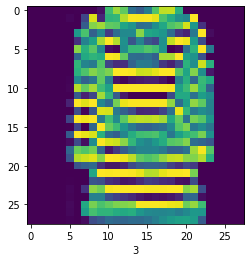

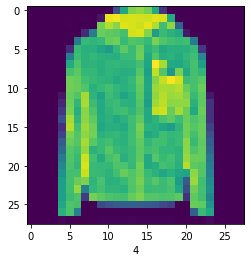

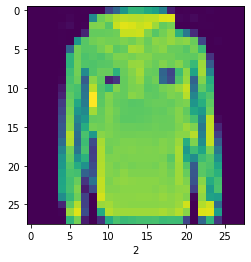

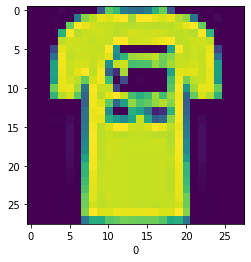

In [5]:
for grid in range(4):
    num = random.randint(0,len(X_train))
    plt.figure()
    plt.imshow(X_train[num])
    plt.xlabel(y_train[num])

In [7]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                            tf.keras.layers.Dense(512,activation='relu'),
                            tf.keras.layers.Dense(10,activation='softmax')])


In [8]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics = ['acc'])

In [9]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        if logs.get('acc')>0.90:
            print("Reached 90% accuracy so cancelling training!")
            self.model.stop_training = True

In [10]:
callbacks = MyCallback()

In [11]:
history = model.fit(X_train,y_train,epochs = 15,callbacks = [callbacks])

Epoch 1/15
1875/1875 [==============================] - 52s 28ms/step - loss: 0.4730 - acc: 0.8305 29 - ETA: 21s - loss: 0.52 - - - ETA: 11s - loss: 0.4946 - acc: 0. - ETA: 11s - ETA: 8s - l - ETA: 6s - loss: 0.4833  - ETA: 3s - - ETA: 1s - loss: 0.475 - ETA: 0s - loss: 0.4748
Epoch 2/15
1875/1875 [==============================] - 44s 24ms/step - loss: 0.3596 - acc: 0.8682TA: 7s - loss: 0.3596 - acc: 0. - ETA: 7s - loss: 0.3 - ETA: 6 - ETA: 4s - loss: 0.3600 - acc:  - ETA: 4s - loss: 0.3599 -  - ETA: 4s - loss: 0.3599 - acc: 0.868 - ETA: 3s - loss: 0.3599 - acc: 0.8 - ETA: 3s - los
Epoch 3/15
1875/1875 [==============================] - 42s 23ms/step - loss: 0.3216 - acc: 0.8832 24s -  - ETA: 16s - loss: 0. - ETA: 14s - loss: 0.3229 - acc:  - ETA: 14 - ETA: 11s - loss: 0.3231 - ETA: 10s - ETA: 9s - loss: 0.3232 - ETA: 8 - ETA: 6s - loss: 0.3237 - acc: 0.8 - ETA: 6s - loss: 0.3237 - acc: 0.882 - ETA: 6s - loss: 0.3236 - ac - ETA: 5s -  - ETA: 4s - loss: 0.3237 -  - ETA: 3 - ETA: 1s - l

In [12]:
model.evaluate(X_test,y_test)


313/313 [==============================] - 1s 4ms/step - loss: 0.3358 - acc: 0.8820


[0.33583736419677734, 0.8820000290870667]

In [13]:
cuda.close()